In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

In [31]:
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('data/final_cleaned_data.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,ID,Gender,Age,Income,Exercise,Coffee,Tea,Soda,Milk,Juice,...,Brand_Reputation,Health_Benefit,Caffeine_Content,Price,Platforms,Units,Purpose,Motto_Price,Motto_Likelihood,Motto_Flavor
0,R_UEENeM2ghM5uKK5,Male,24,">150,000",4-6,4,5,1,1,2,...,4,5,3,0,In-Store Ads,Per Unit,Refreshment,4.0,7,Matcha
1,R_AzdTD7ACCdSVCTv,Male,23,"50,000-100,000",1-3,2,1,5,3,4,...,1,0,1,3,Word of Mouth,Bulk,Refreshment,0.0,0,Rooibos
2,R_2642Y0EiU2ABVzi,Male,24,"100,000-150,000",1-3,2,3,4,1,4,...,3,4,4,4,Word of Mouth,Per Unit,Refreshment,2.0,8,Matcha
3,R_1ONMulo6dpFaq04,Male,26,"<50,000",0,2,4,1,5,2,...,1,5,5,1,Instagram,Per Unit,Increased Focus,6.0,7,Matcha
4,R_1lo8HoT9csBWOxP,Female,24,"100,000-150,000",1-3,2,3,1,2,3,...,1,5,5,3,Word of Mouth,Per Unit,Increased Focus,6.5,7,Matcha


In [3]:
df.columns

Index(['ID', 'Gender', 'Age', 'Income', 'Exercise', 'Coffee', 'Tea', 'Soda',
       'Milk', 'Juice', 'EnergyDrink', 'SparklingWater', 'Alcohol',
       'Purchase_Location', 'Ingredients_Quality', 'Consumption', 'Taste',
       'Brand_Reputation', 'Health_Benefit', 'Caffeine_Content', 'Price',
       'Platforms', 'Units', 'Purpose', 'Motto_Price', 'Motto_Likelihood',
       'Motto_Flavor'],
      dtype='object')

# Backward Selection - Motto_Likelihood as the Dependent Variable

In [4]:
reg = smf.ols('Motto_Likelihood ~ Gender + Age + Income + Exercise + C(Coffee) + C(Tea) + C(Soda) + C(Milk) + C(Juice) + C(EnergyDrink) + C(SparklingWater) + C(Alcohol) + Purchase_Location + C(Ingredients_Quality) + Consumption + C(Taste) + C(Brand_Reputation) + C(Health_Benefit) + C(Caffeine_Content) + C(Price) + Platforms + Units + Purpose + Motto_Price + Motto_Flavor', data=df).fit()
print(reg.rsquared_adj)
reg.pvalues.nlargest(5)

-0.10057617186310219


C(Juice)[T.4]             0.998403
Income[T.>150,000]        0.990522
C(Alcohol)[T.4]           0.983932
C(Health_Benefit)[T.3]    0.980357
C(Milk)[T.4]              0.951078
dtype: float64

In [5]:
# Delete Juice
reg = smf.ols('Motto_Likelihood ~ Gender + Age + Income + Exercise + C(Coffee) + C(Tea) + C(Soda) + C(Milk) + C(EnergyDrink) + C(SparklingWater) + C(Alcohol) + Purchase_Location + C(Ingredients_Quality) + Consumption + C(Taste) + C(Brand_Reputation) + C(Health_Benefit) + C(Caffeine_Content) + C(Price) + Platforms + Units + Purpose + Motto_Price + Motto_Flavor', data=df).fit()
print(reg.rsquared_adj)
reg.pvalues.nlargest(5)

0.014729948811776028


C(EnergyDrink)[T.3]                  0.983756
C(Taste)[T.5]                        0.982828
C(Ingredients_Quality)[T.3]          0.978892
Purchase_Location[T.Supermarkets]    0.976995
C(Taste)[T.4]                        0.950613
dtype: float64

In [6]:
# Delete EnergyDrink
reg = smf.ols('Motto_Likelihood ~ Gender + Age + Income + Exercise + C(Coffee) + C(Tea) + C(Soda) + C(Milk) + C(SparklingWater) + C(Alcohol) + Purchase_Location + C(Ingredients_Quality) + Consumption + C(Taste) + C(Brand_Reputation) + C(Health_Benefit) + C(Caffeine_Content) + C(Price) + Platforms + Units + Purpose + Motto_Price + Motto_Flavor', data=df).fit()
print(reg.rsquared_adj)
reg.pvalues.nlargest(5)

0.026665169289427193


C(Soda)[T.4]                   0.998908
C(Ingredients_Quality)[T.3]    0.997588
C(Price)[T.4]                  0.974849
C(Price)[T.3]                  0.973213
C(Price)[T.5]                  0.964199
dtype: float64

In [7]:
# Delete Soda
reg = smf.ols('Motto_Likelihood ~ Gender + Age + Income + Exercise + C(Coffee) + C(Tea) + C(Milk) + C(SparklingWater) + C(Alcohol) + Purchase_Location + C(Ingredients_Quality) + Consumption + C(Taste) + C(Brand_Reputation) + C(Health_Benefit) + C(Caffeine_Content) + C(Price) + Platforms + Units + Purpose + Motto_Price + Motto_Flavor', data=df).fit()
print(reg.rsquared_adj)
reg.pvalues.nlargest(5)

0.0800567915831808


C(Coffee)[T.3]                 0.994176
C(Price)[T.3]                  0.965638
C(Ingredients_Quality)[T.3]    0.954595
Gender[T.Male]                 0.938985
C(Tea)[T.2]                    0.935540
dtype: float64

In [8]:
# Delete Coffee
reg = smf.ols('Motto_Likelihood ~ Gender + Age + Income + Exercise + C(Tea) + C(Milk) + C(SparklingWater) + C(Alcohol) + Purchase_Location + C(Ingredients_Quality) + Consumption + C(Taste) + C(Brand_Reputation) + C(Health_Benefit) + C(Caffeine_Content) + C(Price) + Platforms + Units + Purpose + Motto_Price + Motto_Flavor', data=df).fit()
print(reg.rsquared_adj)
reg.pvalues.nlargest(5)

0.1616723299969015


C(Milk)[T.4]                   0.990358
C(Ingredients_Quality)[T.3]    0.951641
C(Milk)[T.5]                   0.916559
C(Taste)[T.5]                  0.874086
C(Tea)[T.2]                    0.867714
dtype: float64

In [9]:
# Delete Milk
reg = smf.ols('Motto_Likelihood ~ Gender + Age + Income + Exercise + C(Tea) + C(SparklingWater) + C(Alcohol) + Purchase_Location + C(Ingredients_Quality) + Consumption + C(Taste) + C(Brand_Reputation) + C(Health_Benefit) + C(Caffeine_Content) + C(Price) + Platforms + Units + Purpose + Motto_Price + Motto_Flavor', data=df).fit()
print(reg.rsquared_adj)
reg.pvalues.nlargest(5)

0.22773634982501578


C(Taste)[T.5]                  0.948953
C(Taste)[T.3]                  0.928485
C(Ingredients_Quality)[T.3]    0.922795
C(Tea)[T.5]                    0.902577
Intercept                      0.866680
dtype: float64

In [10]:
# Delete Taste
reg = smf.ols('Motto_Likelihood ~ Gender + Age + Income + Exercise + C(Tea) + C(SparklingWater) + C(Alcohol) + Purchase_Location + C(Ingredients_Quality) + Consumption + C(Brand_Reputation) + C(Health_Benefit) + C(Caffeine_Content) + C(Price) + Platforms + Units + Purpose + Motto_Price + Motto_Flavor', data=df).fit()
print(reg.rsquared_adj)
reg.pvalues.nlargest(5)

0.2466846025729862


C(Tea)[T.2]                0.924315
Income[T.<50,000]          0.883943
C(Tea)[T.5]                0.876826
Motto_Flavor[T.Rooibos]    0.822042
Intercept                  0.810749
dtype: float64

In [11]:
# Delete Tea
reg = smf.ols('Motto_Likelihood ~ Gender + Age + Income + Exercise + C(SparklingWater) + C(Alcohol) + Purchase_Location + C(Ingredients_Quality) + Consumption + C(Brand_Reputation) + C(Health_Benefit) + C(Caffeine_Content) + C(Price) + Platforms + Units + Purpose + Motto_Price + Motto_Flavor', data=df).fit()
print(reg.rsquared_adj)
reg.pvalues.nlargest(5)

0.2636908192990476


C(Price)[T.3]               0.993856
C(Brand_Reputation)[T.1]    0.974331
C(SparklingWater)[T.4]      0.949816
Intercept                   0.933666
Income[T.<50,000]           0.891556
dtype: float64

In [12]:
# Delete Brand_Reputation
reg = smf.ols('Motto_Likelihood ~ Gender + Age + Income + Exercise + C(SparklingWater) + C(Alcohol) + Purchase_Location + C(Ingredients_Quality) + Consumption + C(Health_Benefit) + C(Caffeine_Content) + C(Price) + Platforms + Units + Purpose + Motto_Price + Motto_Flavor', data=df).fit()
print(reg.rsquared_adj)
reg.pvalues.nlargest(5)

0.275583506720976


Income[T.<50,000]          0.994260
C(SparklingWater)[T.4]     0.959640
Motto_Flavor[T.Rooibos]    0.956640
C(Price)[T.3]              0.915952
C(Health_Benefit)[T.4]     0.843065
dtype: float64

In [13]:
# Delete Income
reg = smf.ols('Motto_Likelihood ~ Gender + Age + Exercise + C(SparklingWater) + C(Alcohol) + Purchase_Location + C(Ingredients_Quality) + Consumption + C(Health_Benefit) + C(Caffeine_Content) + C(Price) + Platforms + Units + Purpose + Motto_Price + Motto_Flavor', data=df).fit()
print(reg.rsquared_adj)
reg.pvalues.nlargest(5)

0.31079542842053065


C(SparklingWater)[T.4]     0.949303
C(Price)[T.3]              0.913155
Motto_Flavor[T.Rooibos]    0.898014
C(Price)[T.4]              0.808175
Exercise[T.7+]             0.800339
dtype: float64

In [14]:
# Delete SparklingWater
reg = smf.ols('Motto_Likelihood ~ Gender + Age + Exercise + C(Alcohol) + Purchase_Location + C(Ingredients_Quality) + Consumption + C(Health_Benefit) + C(Caffeine_Content) + C(Price) + Platforms + Units + Purpose + Motto_Price + Motto_Flavor', data=df).fit()
print(reg.rsquared_adj)
reg.pvalues.nlargest(5)

0.3496030329363834


C(Price)[T.3]                 0.922351
Motto_Flavor[T.Rooibos]       0.862283
C(Health_Benefit)[T.4]        0.822556
Consumption                   0.822282
Platforms[T.Word of Mouth]    0.816740
dtype: float64

In [15]:
# Delete Motto_Flavor
reg = smf.ols('Motto_Likelihood ~ Gender + Age + Exercise + C(Alcohol) + Purchase_Location + C(Ingredients_Quality) + Consumption + C(Health_Benefit) + C(Caffeine_Content) + C(Price) + Platforms + Units + Purpose + Motto_Price', data=df).fit()
print(reg.rsquared_adj)
reg.pvalues.nlargest(5)

0.359774964043604


C(Price)[T.3]                 0.898377
C(Health_Benefit)[T.4]        0.836335
Platforms[T.Word of Mouth]    0.827190
C(Price)[T.4]                 0.785263
Consumption                   0.756358
dtype: float64

In [16]:
# Delete Health_Benefit
reg = smf.ols('Motto_Likelihood ~ Gender + Age + Exercise + C(Alcohol) + Purchase_Location + C(Ingredients_Quality) + Consumption + C(Caffeine_Content) + C(Price) + Platforms + Units + Purpose + Motto_Price', data=df).fit()
print(reg.rsquared_adj)
reg.pvalues.nlargest(10)

0.38306743194201676


Purpose[T.Energy Boost]          0.953519
C(Price)[T.3]                    0.884409
Purpose[T.Dining Compliments]    0.769627
C(Price)[T.4]                    0.757363
Platforms[T.Word of Mouth]       0.749429
C(Alcohol)[T.4]                  0.739280
Consumption                      0.708870
Purpose[T.Refreshment]           0.688078
C(Price)[T.5]                    0.620365
Exercise[T.7+]                   0.593167
dtype: float64

In [17]:
# Delete Consumption
reg = smf.ols('Motto_Likelihood ~ Gender + Age + Exercise + C(Alcohol) + Purchase_Location + C(Ingredients_Quality) + C(Caffeine_Content) + C(Price) + Platforms + Units + Purpose + Motto_Price', data=df).fit()
print(reg.rsquared_adj)
reg.pvalues.nlargest(10)

0.3909805834397303


Purpose[T.Energy Boost]          0.943488
C(Price)[T.3]                    0.868068
C(Price)[T.4]                    0.757860
Platforms[T.Word of Mouth]       0.749823
C(Alcohol)[T.4]                  0.738966
Purpose[T.Dining Compliments]    0.738239
C(Price)[T.5]                    0.663494
Purpose[T.Refreshment]           0.659680
Exercise[T.7+]                   0.642034
C(Caffeine_Content)[T.5]         0.548866
dtype: float64

In [18]:
# Delete Exercise
reg = smf.ols('Motto_Likelihood ~ Gender + Age + C(Alcohol) + Purchase_Location + C(Ingredients_Quality) + C(Caffeine_Content) + C(Price) + Platforms + Units + Purpose + Motto_Price', data=df).fit()
print(reg.rsquared_adj)
reg.pvalues.nlargest(10)

0.40466646625884006


Purpose[T.Energy Boost]          0.973441
C(Price)[T.3]                    0.881281
Purpose[T.Dining Compliments]    0.834922
C(Alcohol)[T.4]                  0.773642
Purpose[T.Refreshment]           0.772005
Platforms[T.Word of Mouth]       0.744593
C(Price)[T.4]                    0.739448
C(Price)[T.5]                    0.600652
C(Caffeine_Content)[T.5]         0.551710
Purpose[T.Increased Focus]       0.457683
dtype: float64

In [19]:
reg = smf.ols('Motto_Likelihood ~ Gender + Age + C(Alcohol) + Purchase_Location + C(Ingredients_Quality) + C(Caffeine_Content) + C(Price) + Platforms + Units + Purpose + Motto_Price', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Motto_Likelihood   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     3.215
Date:                Mon, 01 May 2023   Prob (F-statistic):           2.66e-05
Time:                        13:37:32   Log-Likelihood:                -195.11
No. Observations:                 102   AIC:                             454.2
Df Residuals:                      70   BIC:                             538.2
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  4.2542      3.943      1.079      0.284      -3.611      12.119
Gender[T.Male]                             0.5677      0.517      1.098      0.276      -0.464       1.599
C(Alcohol)[T.2]                           -1.0330      0.706     -1.464      0.148      -2.440       0.374
C(Alcohol)[T.3]                           -1.2254      0.654     -1.875      0.065      -2.529       0.078
C(Alcohol)[T.4]                            0.2331      0.807      0.289      0.774      -1.377       1.843
C(Alcohol)[T.5]                           -1.0921      0.825     -1.324      0.190      -2.737       0.553
Purchase_Location[T.Online]               -1.9851      1.284     -1.547      0.126      -4.545       0.575
Purchase_Location[T.Restaurants/Cafes]    -0.9374      0.574     -1.632      0.107      -2.083       0.208
Purchase_Location[T.Supermarkets]         -0.8046      0.659     -1.222      0.226      -2.118       0.509
C(Ingredients_Quality)[T.1]                1.9155      1.165      1.644      0.105      -0.409       4.240
C(Ingredients_Quality)[T.3]                1.4598      1.209      1.208      0.231      -0.951       3.870
C(Ingredients_Quality)[T.4]                3.5420      1.203      2.945      0.004       1.143       5.941
C(Ingredients_Quality)[T.5]                3.3637      1.270      2.649      0.010       0.831       5.896
C(Caffeine_Content)[T.1]                  -2.4491      0.917     -2.670      0.009      -4.279      -0.620
C(Caffeine_Content)[T.3]                  -0.8678      0.764     -1.136      0.260      -2.391       0.656
C(Caffeine_Content)[T.4]                   0.6991      0.796      0.878      0.383      -0.888       2.286
C(Caffeine_Content)[T.5]                  -0.5680      0.950     -0.598      0.552      -2.462       1.326
C(Price)[T.1]                             -1.5156      1.337     -1.133      0.261      -4.183       1.152
C(Price)[T.3]                             -0.1871      1.248     -0.150      0.881      -2.677       2.303
C(Price)[T.4]                              0.4183      1.253      0.334      0.739      -2.080       2.917
C(Price)[T.5]                              0.6975      1.326      0.526      0.601      -1.948       3.343
Platforms[T.Instagram]                     1.2769      1.045      1.221      0.226      -0.808       3.362
Platforms[T.TikTok]                        1.9050      0.967      1.971      0.053      -0.023       3.833
Platforms[T.Web Ads]                       6.3408      2.077      3.053      0.003       2.199      10.483
Platforms[T.Word of Mouth]                 0.2488      0.761      0.327      0.745      -1.268       1.766
Units[T.Per Unit]                          0.4848      0.543      0.893      0.375     

# Backward Selection - Motto_Price as the Dependent Variable

In [20]:
reg2 = smf.ols('Motto_Price ~ Gender + Age + Income + Exercise + C(Coffee) + C(Tea) + C(Soda) + C(Milk) + C(Juice) + C(EnergyDrink) + C(SparklingWater) + C(Alcohol) + Purchase_Location + C(Ingredients_Quality) + Consumption + C(Taste) + C(Brand_Reputation) + C(Health_Benefit) + C(Caffeine_Content) + C(Price) + Platforms + Units + Purpose + Motto_Likelihood + Motto_Flavor', data=df).fit()
print(reg2.rsquared_adj)
reg2.pvalues.nlargest(5)

0.4964858524885102


C(Tea)[T.5]                          0.931746
C(Caffeine_Content)[T.3]             0.917071
C(Juice)[T.2]                        0.916925
C(SparklingWater)[T.3]               0.906746
Purchase_Location[T.Supermarkets]    0.902059
dtype: float64

In [21]:
# Remove Caffeine Content

reg2 = smf.ols('Motto_Price ~ Gender + Age + Income + Exercise + C(Coffee) + C(Tea) + C(Soda) + C(Milk) + C(Juice) + C(EnergyDrink) + C(SparklingWater) + C(Alcohol) + Purchase_Location + C(Ingredients_Quality) + Consumption + C(Taste) + C(Brand_Reputation) + C(Health_Benefit) + C(Price) + Platforms + Units + Purpose + Motto_Likelihood + Motto_Flavor', data=df).fit()
print(reg2.rsquared_adj)
reg2.pvalues.nlargest(5)

0.5190102208285432


C(Taste)[T.5]                  0.988283
C(Tea)[T.5]                    0.972204
C(Ingredients_Quality)[T.1]    0.946684
Motto_Likelihood               0.942565
C(Alcohol)[T.4]                0.937987
dtype: float64

In [22]:
# Remove Motto_Likelihood

reg2 = smf.ols('Motto_Price ~ Gender + Age + Income + Exercise + C(Coffee) + C(Tea) + C(Soda) + C(Milk) + C(Juice) + C(EnergyDrink) + C(SparklingWater) + C(Alcohol) + Purchase_Location + C(Ingredients_Quality) + Consumption + C(Taste) + C(Brand_Reputation) + C(Health_Benefit) + C(Price) + Platforms + Units + Purpose + Motto_Flavor', data=df).fit()
print(reg2.rsquared_adj)
reg2.pvalues.nlargest(5)

0.5360975860876052


C(Taste)[T.5]                  0.988464
C(Tea)[T.5]                    0.965976
C(Ingredients_Quality)[T.1]    0.945189
C(Alcohol)[T.4]                0.940586
C(SparklingWater)[T.3]         0.938359
dtype: float64

In [23]:
# Remove Alcohol

reg2 = smf.ols('Motto_Price ~ Gender + Age + Income + Exercise + C(Coffee) + C(Tea) + C(Soda) + C(Milk) + C(Juice) + C(EnergyDrink) + C(SparklingWater) + Purchase_Location + C(Ingredients_Quality) + Consumption + C(Taste) + C(Brand_Reputation) + C(Health_Benefit) + C(Price) + Platforms + Units + Purpose + Motto_Flavor', data=df).fit()
print(reg2.rsquared_adj)
reg2.pvalues.nlargest(5)

0.5547466005215916


C(Tea)[T.5]                    0.982758
Platforms[T.Web Ads]           0.939649
C(Ingredients_Quality)[T.1]    0.907985
Consumption                    0.906828
C(Soda)[T.5]                   0.896581
dtype: float64

In [24]:
# Remove Consumption

reg2 = smf.ols('Motto_Price ~ Gender + Age + Income + Exercise + C(Coffee) + C(Tea) + C(Soda) + C(Milk) + C(Juice) + C(EnergyDrink) + C(SparklingWater) + Purchase_Location + C(Ingredients_Quality) + C(Taste) + C(Brand_Reputation) + C(Health_Benefit) + C(Price) + Platforms + Units + Purpose + Motto_Flavor', data=df).fit()
print(reg2.rsquared_adj)
reg2.pvalues.nlargest(15)

0.5680513501357746


C(Tea)[T.5]                               0.952942
Platforms[T.Web Ads]                      0.927834
C(Ingredients_Quality)[T.1]               0.913137
C(Soda)[T.5]                              0.908065
C(Taste)[T.5]                             0.863918
C(Health_Benefit)[T.4]                    0.832741
C(Milk)[T.2]                              0.827249
C(Coffee)[T.3]                            0.819151
C(Coffee)[T.4]                            0.803755
C(Milk)[T.3]                              0.784479
C(SparklingWater)[T.3]                    0.771297
C(Taste)[T.4]                             0.713398
C(Juice)[T.2]                             0.678757
Purchase_Location[T.Restaurants/Cafes]    0.662001
Units[T.Per Unit]                         0.624257
dtype: float64

In [25]:
# Remove SparklingWater

reg2 = smf.ols('Motto_Price ~ Gender + Age + Income + Exercise + C(Coffee) + C(Tea) + C(Soda) + C(Milk) + C(Juice) + C(EnergyDrink) + Purchase_Location + C(Ingredients_Quality) + C(Taste) + C(Brand_Reputation) + C(Health_Benefit) + C(Price) + Platforms + Units + Purpose + Motto_Flavor', data=df).fit()
print(reg2.rsquared_adj)
reg2.pvalues.nlargest(5)

0.5785785924992526


C(Health_Benefit)[T.4]         0.984149
C(Taste)[T.5]                  0.963112
C(Ingredients_Quality)[T.1]    0.960929
Gender[T.Male]                 0.913507
Units[T.Per Unit]              0.880580
dtype: float64

In [26]:
# Remove Gender

reg2 = smf.ols('Motto_Price ~ Age + Income + Exercise + C(Coffee) + C(Tea) + C(Soda) + C(Milk) + C(Juice) + C(EnergyDrink) + Purchase_Location + C(Ingredients_Quality) + C(Taste) + C(Brand_Reputation) + C(Health_Benefit) + C(Price) + Platforms + Units + Purpose + Motto_Flavor', data=df).fit()
print(reg2.rsquared_adj)
reg2.pvalues.nlargest(5)

0.5895359941999463


C(Taste)[T.5]                  0.991194
C(Health_Benefit)[T.4]         0.980263
C(Ingredients_Quality)[T.1]    0.974128
Platforms[T.Web Ads]           0.860553
Units[T.Per Unit]              0.843149
dtype: float64

In [27]:
# Remove Units

reg2 = smf.ols('Motto_Price ~ Age + Income + Exercise + C(Coffee) + C(Tea) + C(Soda) + C(Milk) + C(Juice) + C(EnergyDrink) + Purchase_Location + C(Ingredients_Quality) + C(Taste) + C(Brand_Reputation) + C(Health_Benefit) + C(Price) + Platforms + Purpose + Motto_Flavor', data=df).fit()
print(reg2.rsquared_adj)
reg2.pvalues.nlargest(15)

0.599642982225784


C(Taste)[T.5]                        0.993532
C(Health_Benefit)[T.4]               0.987456
C(Ingredients_Quality)[T.1]          0.983119
Platforms[T.Web Ads]                 0.855449
C(Tea)[T.5]                          0.847915
C(Coffee)[T.4]                       0.810698
C(Juice)[T.2]                        0.763574
C(Milk)[T.2]                         0.751327
Purchase_Location[T.Supermarkets]    0.729777
C(Tea)[T.4]                          0.724515
C(Milk)[T.3]                         0.717191
C(Tea)[T.2]                          0.649042
C(Soda)[T.5]                         0.541774
C(Juice)[T.4]                        0.486908
C(Taste)[T.4]                        0.485688
dtype: float64

In [28]:
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Motto_Price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     3.440
Date:                Mon, 01 May 2023   Prob (F-statistic):           4.06e-05
Time:                        13:37:33   Log-Likelihood:                -98.741
No. Observations:                 102   AIC:                             323.5
Df Residuals:                      39   BIC:                             488.9
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 19.6233      2.984      6.577      0.000      13.588      25.658
Income[T.50,000-100,000]                  -1.4302      0.556     -2.572      0.014      -2.555      -0.305
Income[T.<50,000]                         -1.6783      0.517     -3.249      0.002      -2.723      -0.634
Income[T.>150,000]                        -1.6684      0.524     -3.181      0.003      -2.729      -0.607
Exercise[T.1-3]                           -0.6981      0.441     -1.582      0.122      -1.591       0.194
Exercise[T.4-6]                           -1.0756      0.453     -2.374      0.023      -1.992      -0.159
Exercise[T.7+]                            -3.1233      1.008     -3.100      0.004      -5.161      -1.085
C(Coffee)[T.2]                            -0.8571      0.565     -1.518      0.137      -1.999       0.285
C(Coffee)[T.3]                            -0.5631      0.673     -0.837      0.408      -1.924       0.798
C(Coffee)[T.4]                            -0.1163      0.482     -0.241      0.811      -1.091       0.859
C(Coffee)[T.5]                            -0.8988      0.441     -2.038      0.048      -1.791      -0.007
C(Tea)[T.2]                                0.3299      0.719      0.459      0.649      -1.125       1.785
C(Tea)[T.3]                                1.9408      0.599      3.240      0.002       0.729       3.152
C(Tea)[T.4]                                0.2139      0.602      0.355      0.725      -1.005       1.433
C(Tea)[T.5]                               -0.1485      0.769     -0.193      0.848      -1.705       1.408
C(Soda)[T.2]                               0.4669      0.460      1.015      0.316      -0.463       1.397
C(Soda)[T.3]                               1.4871      0.560      2.656      0.011       0.354       2.620
C(Soda)[T.4]                               0.5778      0.536      1.078      0.288      -0.507       1.662
C(Soda)[T.5]                               0.3858      0.627      0.616      0.542      -0.882       1.654
C(Milk)[T.2]                              -0.1283      0.402     -0.319      0.751      -0.941       0.685
C(Milk)[T.3]                              -0.1734      0.475     -0.365      0.717      -1.135       0.788
C(Milk)[T.4]                               1.0255      0.595      1.723      0.093      -0.178       2.229
C(Milk)[T.5]                               1.2110      0.687      1.763      0.086      -0.178       2.600
C(Juice)[T.2]                              0.1889      0.624      0.303      0.764      -1.072       1.450
C(Juice)[T.3]                              1.0836      0.612      1.772      0.084      -0.154       2.321
C(Juice)[T.4]                             -0.3922      0.559     -0.702      0.487     

# Check if the model predicts well

First Model - Motto_Likelihood

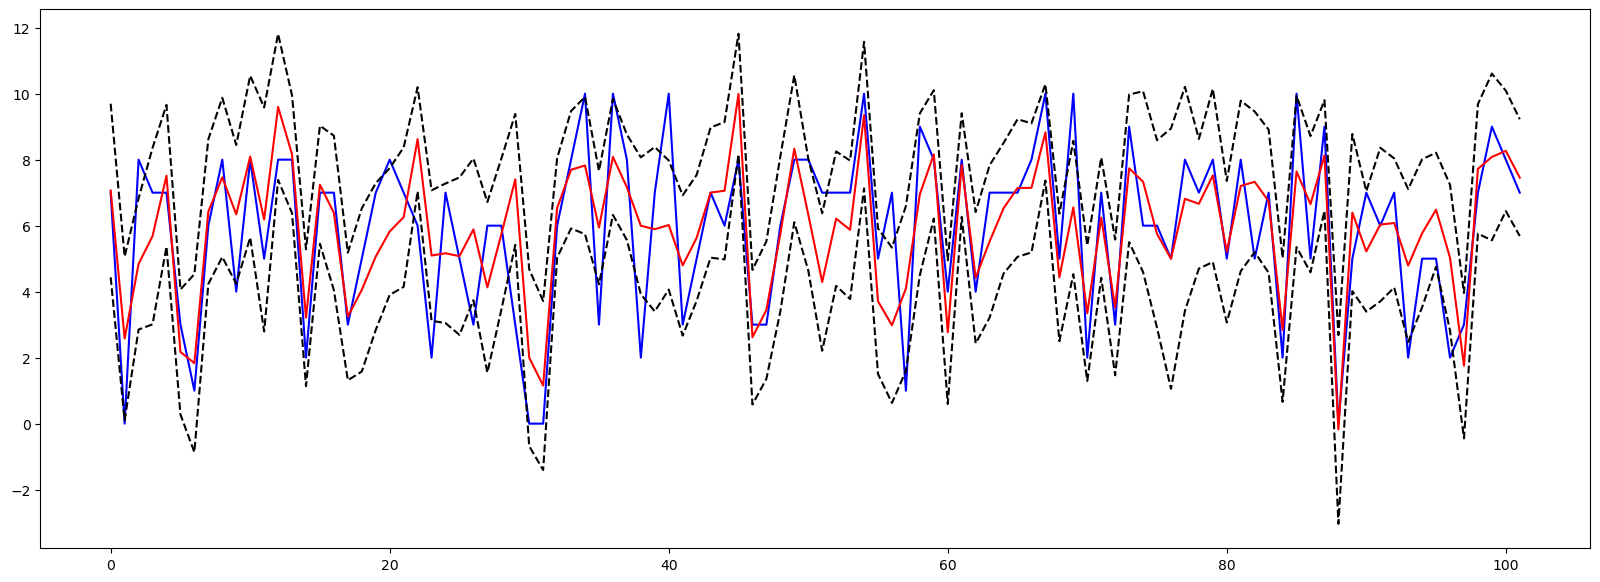

In [29]:
pred = reg.get_prediction(df).summary_frame()

y_hat = pred['mean']
y_lb = pred['mean_ci_lower']
y_ub = pred['mean_ci_upper']

plt.figure(figsize=(20,7))
df.Motto_Likelihood.plot(color='blue')
y_hat.plot(color='red')
y_lb.plot(color='black', linestyle='dashed')
y_ub.plot(color='black', linestyle='dashed')
plt.show()

Second Model - Motto_Price

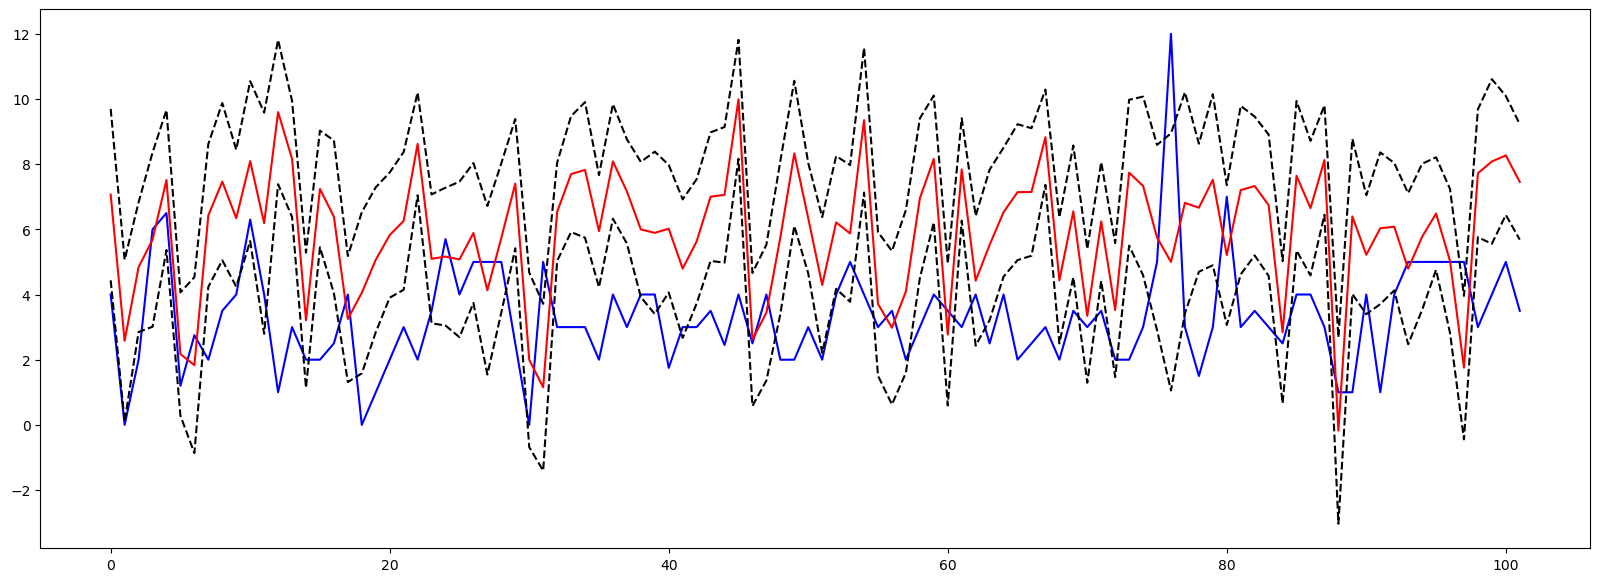

In [30]:
pred2 = reg2.get_prediction(df).summary_frame()

y_hat2 = pred['mean']
y_lb2 = pred['mean_ci_lower']
y_ub2 = pred['mean_ci_upper']

plt.figure(figsize=(20,7))
df.Motto_Price.plot(color='blue')
y_hat2.plot(color='red')
y_lb2.plot(color='black', linestyle='dashed')
y_ub2.plot(color='black', linestyle='dashed')
plt.show()